In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'/kaggle/working'

In [3]:
meta_films = pd.read_csv('../input/the-movies-dataset/movies_metadata.csv')

In [4]:
print(f'size of the dataframe {meta_films.shape}') 
print(f'Number of ROWS-- {meta_films.shape[0]}')
print(f'Number of COLUMNS-- {meta_films.shape[1]}')

size of the dataframe (45466, 24)
Number of ROWS-- 45466
Number of COLUMNS-- 24


In [5]:
meta_films.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
meta_films.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
req_data = meta_films.loc[:,['original_title','overview','title','tagline','genres']]

In [8]:
req_data['genres'].ix[128]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]"

In [9]:
req_data['genres'][0].replace("[", "").replace("]", "").replace("'", '"')

'{"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}'

genres=[]
for i in req_data['genres']:
    genres.append(i.replace("'", '"'))
    
req_data['new']=genres

In [10]:
import ast
req_data['genres'] = req_data['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [11]:
req_data.head()

,original_title,overview,title,tagline,genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Toy Story,NaN,"[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,Jumanji,Roll the dice and unleash the excitement!,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,"[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,Friends are the people who let you be yourself...,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,[Comedy]


In [12]:
req_data.isnull().sum()

original_title        0
overview            954
title                 6
tagline           25054
genres                0
dtype: int64

In [13]:
req_data.shape

(45466, 5)

#### Dropping the rows wherevere there is Missing value's in both overwiew and tagline columns

In [14]:
req_data['freq_na'] = req_data.apply(lambda x: x.count(), axis=1)
count = req_data[ req_data['freq_na'] == 3 ].index
req_data.drop(count , inplace=True)
req_data.shape

(44514, 6)

In [15]:
#req_data['Description'] = req_data['overview'].str.cat(req_data['tagline'],sep=" ")
req_data['Description']=req_data['overview'].fillna('') + ' ' + req_data['tagline'].fillna('')

In [16]:
req_data['Description'][2]

"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max. Still Yelling. Still Fighting. Still Ready for Love."

In [17]:
if str(req_data.original_title)==str(req_data.title):
    req_data['movie'] = req_data['title']
else:
    req_data['movie'] = req_data['original_title']
        

In [18]:
req_data.head()

,original_title,overview,title,tagline,genres,freq_na,Description,movie
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Toy Story,NaN,"[Animation, Comedy, Family]",4,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,Jumanji,When siblings Judy and Peter discover an encha...,Jumanji,Roll the dice and unleash the excitement!,"[Adventure, Fantasy, Family]",5,When siblings Judy and Peter discover an encha...,Jumanji
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,"[Romance, Comedy]",5,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,Friends are the people who let you be yourself...,"[Comedy, Drama, Romance]",5,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,[Comedy],5,Just when George Banks has recovered from his ...,Father of the Bride Part II


In [19]:
req_data = req_data.drop(['original_title', 'overview','title','tagline','freq_na'], axis = 1)

In [20]:
req_data.head()

,genres,Description,movie
0,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",Toy Story
1,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,Jumanji
2,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,[Comedy],Just when George Banks has recovered from his ...,Father of the Bride Part II


In [21]:
genres = req_data['genres']
all_genres=sum(genres,[])
len(set(all_genres))

20

In [22]:
import nltk
all_genres=nltk.FreqDist(all_genres)
all_genres_df=pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})


g=all_genres_df.nlargest(columns="Count",n=20)
#plt.figure(figsize=(12,15))
#ax=sns.barplot(data=g,x="Count",y="Genre")
#ax.set(ylabel='Count')
#plt.show()
g

,Genre,Count
6,Drama,20024
1,Comedy,12810
9,Thriller,7585
5,Romance,6674
7,Action,6564
10,Horror,4659
8,Crime,4270
17,Documentary,3886
3,Adventure,3471
12,Science Fiction,3027


In [23]:
import re
def clean_text(text):
    text = re.sub("\'", "", str(text))
    text=re.sub("[^a-zA-Z]"," ",str(text))
    text=' '.join(text.split())
    text=text.lower()
    return text

In [24]:
req_data['description']=req_data['Description'].apply(lambda x: clean_text(x))
req_data = req_data.drop(['Description'], axis = 1)

In [25]:
req_data

,genres,movie,description
0,"[Animation, Comedy, Family]",Toy Story,led by woody andys toys live happily in his ro...
1,"[Adventure, Fantasy, Family]",Jumanji,when siblings judy and peter discover an encha...
2,"[Romance, Comedy]",Grumpier Old Men,a family wedding reignites the ancient feud be...
3,"[Comedy, Drama, Romance]",Waiting to Exhale,cheated on mistreated and stepped on the women...
4,[Comedy],Father of the Bride Part II,just when george banks has recovered from his ...
...,...,...,...
45461,"[Drama, Family]",رگ خواب,rising and falling between a man and woman ris...
45462,[Drama],Siglo ng Pagluluwal,an artist struggles to finish his work while a...
45463,"[Action, Drama, Thriller]",Betrayal,when one of her hits goes wrong a professional...
45464,[],Satana likuyushchiy,in a small town live two brothers one a minist...


In [26]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    no_step_text=[w for w in text.split() if not w in  stop_words]
    return ' '.join(no_step_text)


req_data['description']=req_data['description'].apply(lambda x: remove_stopwords(x))

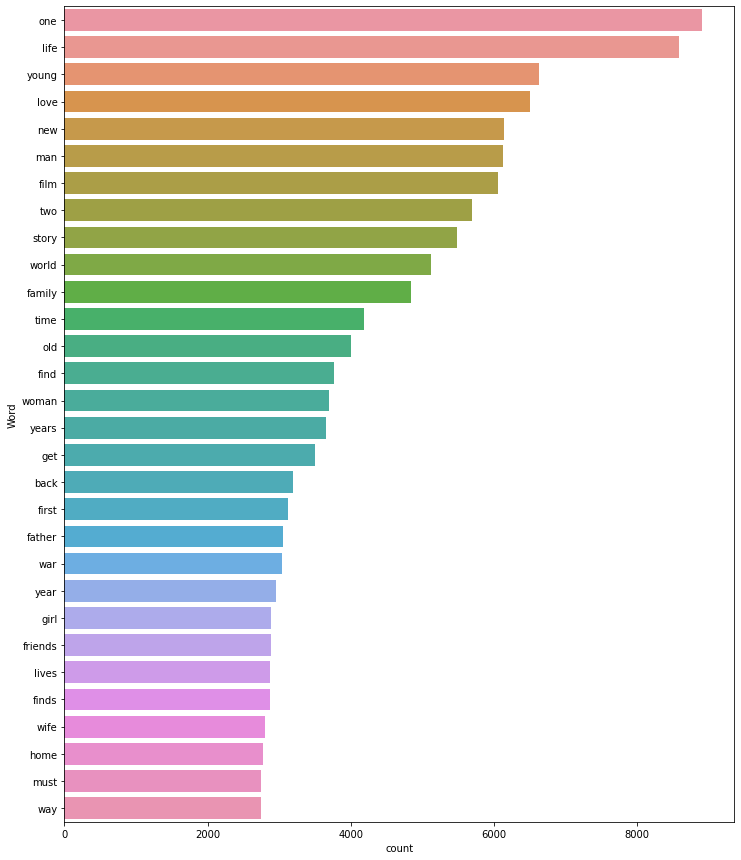

In [27]:
all_words=' '.join([text for text in req_data['description']])
all_words=all_words.split()
fdist=nltk.FreqDist(all_words)
words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
d=words_df.nlargest(columns="count", n=30)
plt.figure(figsize=(12,15))
ax=sns.barplot(data=d,x="count",y="word")
ax.set(ylabel='Word')
plt.show()

#### The other way of looking frequency the words in vocabulary

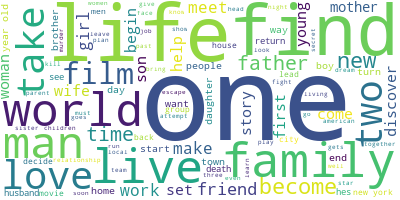

In [28]:
# Create a WordCloud object
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color='steelblue')
words = ','.join(list(req_data['description'].values))
# Generate a word cloud
wordcloud.generate(words)
wordcloud.to_image()

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
mb=MultiLabelBinarizer()
mb.fit(req_data['genres'])

req_data = req_data.join(pd.DataFrame(mb.fit_transform(req_data['genres']),columns=mb.classes_,index=req_data.index))

In [30]:
req_data.shape

(44514, 23)

In [31]:
#### Deleting the rows which are having empty genres

In [32]:
req_data['empty_class'] = req_data.loc[:,'Action':'Western'].sum(axis = 1)
result = req_data[ req_data['empty_class'] == 0 ].index
req_data.drop(result , inplace=True)
req_data.shape

(42328, 24)

In [33]:
y=mb.transform(req_data['genres'])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidfr=TfidfVectorizer(max_features=10000)
bow = CountVectorizer(max_features=10000)

In [35]:
#X_req = req_data.loc[:, ['description','movie']] 
X=tfidfr.fit_transform(req_data['description'])

In [36]:
X.shape

(42328, 10000)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=126)

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
NB = MultinomialNB()
clf = OneVsRestClassifier(NB)
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [39]:
y_pred=clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [40]:
mb.inverse_transform(y_pred)[5]

('Comedy',)

In [41]:
from sklearn.metrics import f1_score
print(f'F1_score for test set{f1_score(y_test,y_pred,average="micro")}')
print(f'F1_score for test set{f1_score(y_train,y_train_pred,average="micro")}')

F1_score for test set0.3896029938171168
F1_score for test set0.45110321427854405


clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

In [42]:
X1 = bow.fit_transform(req_data['description'])

In [43]:
X_train_bow, X_test_bow, y_train, y_test=train_test_split(X1,y,test_size=0.2,random_state=126)

In [44]:
NB1 = MultinomialNB()
clf1 = OneVsRestClassifier(NB1)
clf1.fit(X_train_bow,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [45]:
y_pred_1=clf1.predict(X_test_bow)
y_train_pred_1 = clf1.predict(X_train_bow)

In [46]:
mb.inverse_transform(y_pred_1)[3]

('Comedy', 'Foreign')

In [47]:
print(f'F1_score for test set{f1_score(y_test,y_pred_1,average="micro")}')
print(f'F1_score for train set{f1_score(y_train,y_train_pred_1,average="micro")}')

F1_score for test set0.5692704847499761
F1_score for train set0.6510617072823143


#### Below I have prepared a Keras Bidirectional LSTM model. All the hyper-parameters, embedding length of tokens, input size for each sentence, layer size, different types of layers like 1D Convolution with/without LSTM were tweaked manually. But I still found a normal Bidirectional LSTM model working best for this problem. I did not use pre-trained embeddings because generally they don't work well in case of small datasets, pertaining to the fact that the common tokens turn out to be very less, which reduces the performance further.

In [48]:
import random
from keras.preprocessing import text, sequence
from keras.models import Model
from keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, GlobalAveragePooling1D, Embedding
from keras.optimizers import Adam
from keras.metrics import top_k_categorical_accuracy
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [49]:
tr_titles = 33862
keras_tok = text.Tokenizer()
keras_tok.fit_on_texts(req_data['description'])
new_all_texts = keras_tok.texts_to_sequences(req_data['description'])
X = sequence.pad_sequences(new_all_texts, 250)
X_train = X[:tr_titles, :]
X_test = X[tr_titles:, :]
print (X_train.shape, X_test.shape)

(33862, 250) (8466, 250)


In [50]:
max_features = len(keras_tok.word_counts)
embed_size = 100
max_features

76262

In [51]:
train_idx = random.sample([i for i in range(33862)], int(0.9*33862))
valid_idx = list(set([i for i in range(33862)]) - set(train_idx))

X_tr = X_train[train_idx, :]
y_tr = y[train_idx, :]
X_val = X_train[valid_idx, :]
y_val = y[valid_idx, :]

print (X_tr.shape, y_tr.shape, X_val.shape, y_val.shape)

(30475, 250) (30475, 20) (3387, 250) (3387, 20)


In [52]:
inp = Input((250,))
embed = Embedding(max_features+1, embed_size, input_length=250)(inp)
lstm = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embed)
avg_pool = GlobalAveragePooling1D()(lstm)
dense = Dense(64, activation='relu')(avg_pool)
drop = Dropout(0.1)(dense)
out = Dense(20, activation='sigmoid')(dense)

lstm_model = Model(inp, out)
lstm_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          7626300   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 250, 128)          84480     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
Total params: 7,720,336
Trainable params: 7,720,336
Non-trainable params: 0
_________________________________________________

In [53]:
def top5(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [54]:
lstm_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=[top5])

In [55]:

hist = lstm_model.fit(X_tr, y_tr, batch_size=64, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[ReduceLROnPlateau(factor=0.1, patience=3, verbose=1, min_lr=0.0000001), EarlyStopping(patience=10, verbose=1, restore_best_weights=True)])

Train on 30475 samples, validate on 3387 samples
Epoch 1/10
30475/30475 [==============================] - 245s 8ms/step - loss: 0.3042 - top5: 0.7011 - val_loss: 0.2808 - val_top5: 0.7355
Epoch 2/10
30475/30475 [==============================] - 244s 8ms/step - loss: 0.2730 - top5: 0.7843 - val_loss: 0.2736 - val_top5: 0.7854
Epoch 3/10
30475/30475 [==============================] - 246s 8ms/step - loss: 0.2640 - top5: 0.8125 - val_loss: 0.2744 - val_top5: 0.7862
Epoch 4/10
30475/30475 [==============================] - 247s 8ms/step - loss: 0.2578 - top5: 0.8327 - val_loss: 0.2709 - val_top5: 0.7981
Epoch 5/10
30475/30475 [==============================] - 246s 8ms/step - loss: 0.2484 - top5: 0.8536 - val_loss: 0.2623 - val_top5: 0.8119
Epoch 6/10
30475/30475 [==============================] - 246s 8ms/step - loss: 0.2309 - top5: 0.8634 - val_loss: 0.2458 - val_top5: 0.8299
Epoch 7/10
30475/30475 [==============================] - 243s 8ms/step - loss: 0.2058 - top5: 0.8884 - val_los

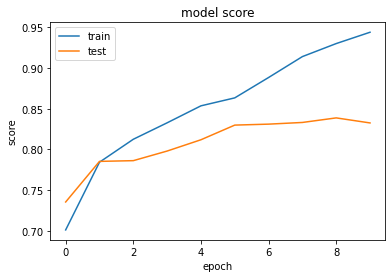

In [56]:
#Summarize model for score
plt.plot(hist.history['top5'])
plt.plot(hist.history['val_top5'])
plt.title('model score')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

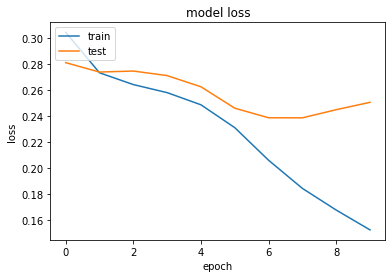

In [57]:
#Summarize model for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()